In [245]:
import pandas as pd
import numpy as np

In [246]:
import warnings
warnings.filterwarnings('ignore')

In [280]:
cp=pd.read_csv(r"C:\python\car_price.csv")
cp

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,volvo,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [248]:
cp.num_of_doors.value_counts()

# in num of door column there is value in object ,four  and two ... and have two ?? as null ... 
# convert it in int by rename and inplace by it by any four beacuse 4 is more..

num_of_doors
four    114
two      89
?         2
Name: count, dtype: int64

In [249]:
cp.isnull().sum()[cp.isnull().sum()>0]

# 1 st time they do not detect any nulls ...but there is ?? present as nulls:;
#  then i  replace consider ?? as a nan(null value )


Series([], dtype: int64)

In [250]:
cp=cp.replace({'?':np.NaN})

# consider ??? as NaN  ..

In [251]:
cp.isnull().sum()[cp.isnull().sum()>0]

# then we find again nulls then therre is few nulls 
# some value contain str values we make it in float value
# which help us in data cleaning..


normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [252]:
cp.num_of_doors.unique()

array(['two', 'four', nan], dtype=object)

In [253]:
# i just remove 1 st null values ...

In [254]:
# convert null values columns in  float  (by using astype)

In [255]:
cp = cp.astype({"normalized_losses":"float",'bore':'float','stroke':'float','horsepower':'float','peak_rpm':'float','price':'float'})

In [256]:
# these above or below lines are  or t each other.,...,.

In [257]:
cp.normalized_losses = cp.normalized_losses.astype(float)
cp.bore = cp.bore.astype(float)
cp.stroke = cp.stroke.astype(float)
cp.horsepower = cp.horsepower.astype(float)
cp.peak_rpm = cp.peak_rpm.astype(float)
cp.price = cp.price.astype(float)

In [258]:
cp.isnull().sum()[cp.isnull().sum()>0]


normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [259]:
cp.normalized_losses.fillna(cp.normalized_losses.mean(), inplace=True)
cp.num_of_doors.fillna("four", inplace=True)
cp.bore.fillna(cp.bore.mean(), inplace=True)
cp.stroke.fillna(cp.stroke.mean(), inplace=True)
cp.horsepower.fillna(cp.horsepower.mean(), inplace=True)
cp.peak_rpm.fillna(cp.peak_rpm.mean(), inplace=True)
cp.price.fillna(cp.price.mean(), inplace=True)


# here i gather the mean from perticuller columns(where null is present) for my data where null is present we fill the empty value by mean .

In [260]:
# these are remaning columns of object where also we need to convert it in the float value ,by finding the unique value from alll columns

In [261]:
cp.select_dtypes(include='object').columns

Index(['Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base',
       'engine_location', 'body_style', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [262]:
cp.Fuel_type.unique()

# covert the str data with float ..by replace key....use this to all  object columns...

array(['gas', 'diesel'], dtype=object)

In [263]:
cp.Fuel_type=cp.Fuel_type.replace({'gas':0,'diesel':1})
cp.make=cp.make.replace({'std':0,'turbo':1})
cp.num_of_doors=cp.num_of_doors.replace({'four':4,'two':2})
cp.aspiration=cp.aspiration.replace({'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4})
cp.wheel_base=cp.wheel_base.replace({'fwd':0,'rwd':1,'4wd':2})
cp.engine_location=cp.engine_location.replace({'front':0,'rear':1})
cp.body_style=cp.body_style.replace({'toyota':0,'nissan':1,'mazda':2,'mitsubishi':3,'honda':4,'subaru':5,'volkswagen':6,'volvo':7,'peugot':8,'dodge':9,'mercedes-benz':10,'bmw':11,'audi':12,'plymouth':13,'saab':14,'porsche':15,'isuzu':16,'alfa-romero':17,'chevrolet':18,'jaguar':19,'renault':20,'mercury':21})
cp.engine_type=cp.engine_type.replace({'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6})
cp.num_of_cylinders=cp.num_of_cylinders.replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})
cp.fuel_system=cp.fuel_system.replace({'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7})

In [264]:
cp.isnull().sum()[cp.isnull().sum()>0]

# make shure that all data is null freee...

Series([], dtype: int64)

In [265]:
cp.info()

# info the data  that shure the there is no any object columns ....
# if there is any object columns ..then also convert it in int/float...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    int64  
 3   make               205 non-null    int64  
 4   num_of_doors       205 non-null    int64  
 5   aspiration         205 non-null    int64  
 6   wheel_base         205 non-null    int64  
 7   engine_location    205 non-null    int64  
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    int64  
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [266]:
cp=df1

In [267]:
from sklearn.model_selection import train_test_split
cp_train, cp_test = train_test_split(cp,test_size=.2)


# trin and test method give us the data in two parts 1 st is the train which contain appprox 80 % data 
# where test contain  only 20 % data ...

In [268]:
# [:,:] rows and columns
#cp_train_x=cp_train.iloc[:,0:-1]
cp_train_x=cp_train.iloc[:,0:25] # all columns but last column is not include
cp_train_y=cp_train.iloc[:,-1]  # only chose the last column

# cp_test_x = cp_test.iloc[:,0:-1]
cp_test_x = cp_test.iloc[:,0:25]# same here also
cp_test_y = cp_test.iloc[:,-1]

In [269]:
# on cp_train_x we use iloc which give me only specific columans and row (we chose all row and only one column)
# train where we train the data 
# test where we test the data ...

In [270]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # store in lr
lr.fit(cp_train_x,cp_train_y)   # build the model ..

LinearRegression()

In [271]:
# we find here r square ..

rsq = lr.score(cp_train_x,cp_train_y) 
rsq

0.8000085248939872

In [272]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]


Adj_Rsq= 1- (1-rsq) * (N-1) / (N-K-1)
Adj_Rsq


# adjusted rsquare ..

0.7572753037174887

In [273]:
lr.intercept_


-4555.075575092473

In [274]:
pred_train = lr.predict(cp_train_x)
pred_train

array([13866.61072075,  7432.32446959, 17430.27042326, 14847.06104576,
        6274.37926374,  7763.20719488, 10914.02825164,  6787.86146652,
       13344.25863434,  8485.14707685, 10249.19873168,  8149.13129041,
       13263.93899313, 11295.80656004, 10476.12181647,  8598.66950285,
       17215.34449264, 11640.73879409,  6800.82324758,  9345.16164617,
        9776.25431715, 14343.16000951, 15517.48425813, 15673.7493174 ,
       11144.08277125, 13857.12880871, 13251.77667082, 13710.55755181,
        7424.45799929,  6341.44376578,  7918.11867463,  9845.67989123,
        8003.39711451, 11588.24881335, 11515.39974184,  9270.80707126,
       14469.26956441, 16440.62803545,  5542.66424011,  8084.19450075,
        8986.22697801, 10845.93886314,  8671.47886858, 12401.60031559,
        7820.83341973,  8192.51588702, 15827.94701914,  7946.80000735,
       15426.70902855, 13211.52346193, 11564.20110582, 12191.44934246,
       16924.76175571, 18103.00141873, 13855.67039486,  6549.89683604,
      

In [275]:
pred_test = lr.predict(cp_test_x)
pred_test

array([13392.08406074,  9452.17592354,  8455.29772668, 10377.66966595,
        6333.80747725, 14302.60717816,  6122.90939124, 15701.56301434,
       16556.98561751,  7116.44407031, 14276.86549224,  7267.75839327,
        6731.39648206,  8598.66950285, 16177.79344174, 12202.4845433 ,
        9561.09979797, 10371.87280369,  8820.96683326,  5751.10250147,
       16445.33439253, 17552.90468758,  7937.61018715, 10503.7860601 ,
        5611.62579777, 15150.75685688, 17859.08818645,  7147.13729729,
       11242.02470923, 13070.12658506, 17197.8153099 , 10552.12787465,
        7154.93049584,  9744.27336213, 11640.73879409, 16194.66614   ])

In [276]:
actual_pred=pd.DataFrame()
actual_pred['Actual'] = cp_test_y
actual_pred['Pred'] = pred_test
actual_pred

,Actual,Pred
171,11549.000000,13392.084061
59,8845.000000,9452.175924
40,10295.000000,8455.297727
85,6989.000000,10377.669666
54,7395.000000,6333.807477
103,13499.000000,14302.607178
150,5348.000000,6122.909391
115,16630.000000,15701.563014
199,18950.000000,16556.985618
118,5572.000000,7116.444070


In [277]:
err_test = actual_pred['Actual'] - actual_pred['Pred']
err_test

171   -1843.084061
59     -607.175924
40     1839.702273
85    -3388.669666
54     1061.192523
103    -803.607178
150    -774.909391
115     928.436986
199    2393.014382
118   -1544.444070
136    3873.134508
98      981.241607
92      117.603518
25    -1906.669503
200     667.206558
190   -2222.484543
184   -1566.099798
81    -1872.872804
23     -863.966833
91      897.897499
112     454.665607
201    1492.095312
37      -42.610187
174     194.213940
89     -112.625798
101   -1651.756857
110   -3999.088186
44     6059.992056
28    -2321.024709
170   -1871.126585
111   -1617.815310
145     706.872125
33     -625.930496
173    -796.273362
0      1854.261206
109   -3754.666140
dtype: float64

In [278]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error


In [220]:
mean_absolute_error(actual_pred['Actual'], actual_pred['Pred'])


1815.884316753755

In [221]:
mean_absolute_percentage_error(actual_pred['Actual'], actual_pred['Pred'])


0.19722048599311526

In [222]:
mean_squared_error(actual_pred['Actual'], actual_pred['Pred'])


5783353.000181452

In [223]:
root_mean_squared_error(actual_pred['Actual'], actual_pred['Pred'])


2404.860287039863

In [224]:
err_train = cp_train_y - pred_train
err_train

168   -3585.380956
39      615.226529
166    -766.082141
187    -124.139116
65     2492.621997
          ...     
158   -1075.620129
137    2998.041977
32      604.627358
139    -168.063765
136    2389.791907
Name: price, Length: 145, dtype: float64

In [225]:
err_train.mean()


-4.277761286959566e-12

In [226]:
err_train.skew()


0.3003542382956708

In [227]:
err_train.kurtosis() + 3


3.0218993767167617

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

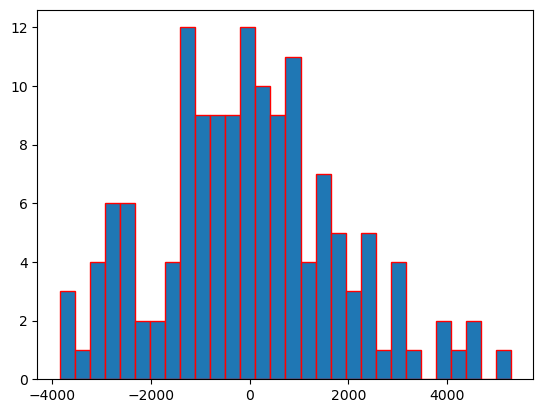

In [229]:
plt.hist(err_train, bins=30, edgecolor='red');


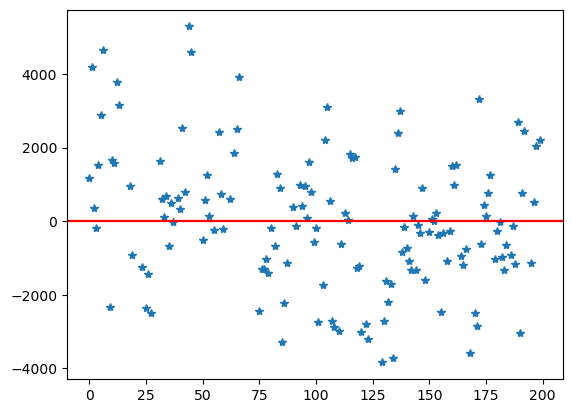

In [230]:
plt.plot(err_train,'*')
plt.axhline(y=0, color='red')
plt.axhline(y=3, color='red')
plt.axhline(y=-3, color='red')

<Axes: ylabel='price'>

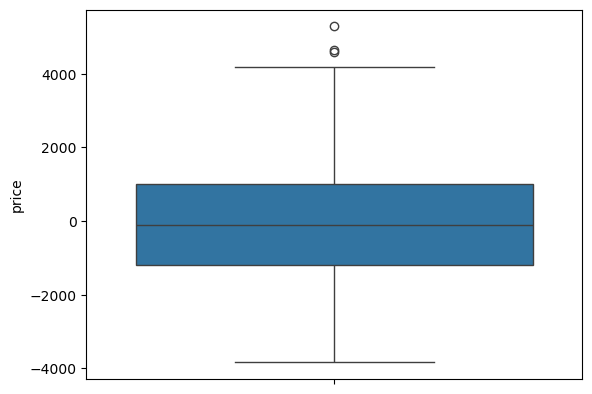

In [231]:
sns.boxplot(err_train)


In [232]:
actual_pred_train = pd.DataFrame()
actual_pred_train['Actual'] = cp_train_y
actual_pred_train['Pred'] = pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

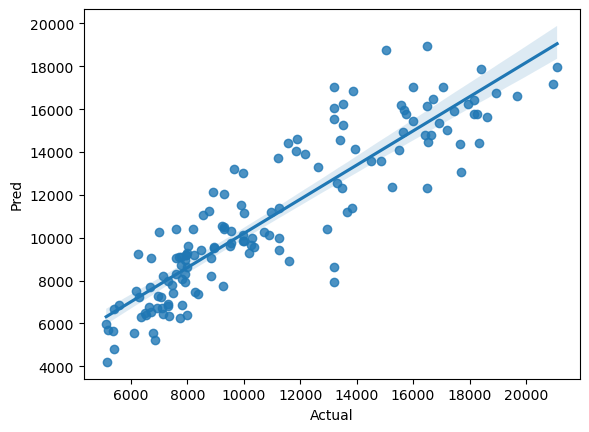

In [233]:
sns.regplot(x='Actual', y='Pred', data=actual_pred_train)


In [234]:
# sse to find msc  ,,,, error ,square , mean....

In [235]:
mse_train_cp = np.mean(np.square(err_train))
mse_test_cp = np.mean(np.square(err_test))
print('MSE train is', mse_train_cp)
print('MSE test is', mse_test_cp)

MSE train is 3420621.192997708
MSE test is 5783353.000181452


In [236]:
# to find rmse square root of mse....

In [237]:
print('RMSE train is',np.sqrt(mse_train_cp)) 
print('RMSE test is',np.sqrt(mse_test_cp))

RMSE train is 1849.492144616383
RMSE test is 2404.860287039863


In [238]:
# to find mape (err train * 100/train y) ,,absolute ,,, mean 

In [239]:
mape_train_cp = np.mean(np.abs(err_train * 100/cp_train_y))
mape_test_cp = np.mean(np.abs(err_test * 100/cp_test_y))
print('MAPE train is', mape_train_cp)
print('MAPE test is', mape_test_cp)

MAPE train is 13.367154974551053
MAPE test is 19.722048599311524


In [240]:
# MSE train is 7480217.515100769
# MSE test is 11459694.914051954

# RMSE train is 2734.9986316451364
# RMSE test is 3385.217114758218

# MAPE train is 17.041217441420933
# MAPE test is 17.750385016677743

In [241]:
# this code used for the remove the outliers ...

In [242]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1, final_list
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean - k * sd)]
    final_list=[x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[ df[col].isin(final_list)];
    # print(df1.shape)
    print('Number of outliers removed are: ', df.shape[0] - df1.shape[0])

In [243]:
remove_outliers(cp, 'price',2)   # call the function ,,,only add the valuesss


Number of outliers removed are:  3


In [244]:
cp = df1


# this cp = df1 ,, is used after the nulls values remove and before creating the sk learn model
#  this if we run it again from cp = df1 to last ,,,
# it will remove more outliers .
# and graph will looks more nomally distributeddd........
